In [1]:
from network import *
import numpy as np 
from scipy.sparse import csr_matrix
from scipy.stats import moment
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("connections.csv", delimiter=",")
N = int(np.max(data)) + 1
A = csr_matrix((np.ones(len(data)), (data[:, 0], data[:, 1])), shape = (N, N), dtype = np.int32)
A = A + A.T
A = 1*(A > 0)

In [3]:
#getting the degrees of the matrix
kmin = 15
degrees = get_degrees(A)

#getting the pdf of the nodes degrees
uniques, pdf = get_neighbours_pdf(degrees)

#getting the cumulative distribution function
cumpdf = ccdf(pdf)

#estimating the parameters to be used in the power law
gamma, c = estimate_power_law(degrees, kmin)
C = c*cumpdf[np.where(uniques == kmin)]
print("gamma = ", gamma)
print("Average degree = ", np.mean(degrees))
print("Statistical power = ", moment(degrees, moment = 2))
print("Third moment = ", moment(degrees, moment = 3))


gamma =  2.4505058418961614
Average degree =  12.287339971550498
Statistical power =  [394.46651113]
Third moment =  [41720.78892784]


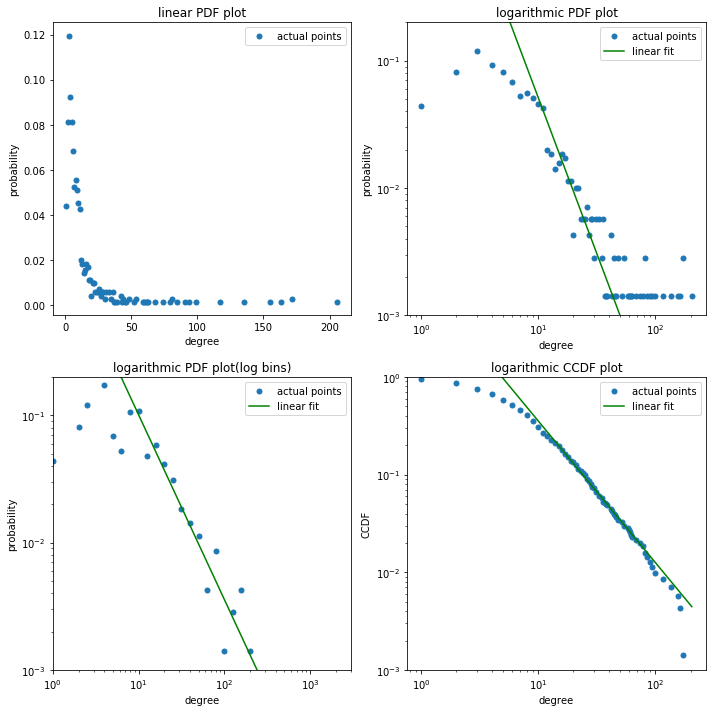

In [4]:
%matplotlib inline
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

#plotting the pdf
axs[0, 0].set_title("linear PDF plot")
axs[0, 0].plot(uniques, pdf, marker='o', linestyle='None', ms = 5)
axs[0, 0].set(xlabel='degree', ylabel='probability')
axs[0, 0].legend(["actual points"])

#plotting the pdf and the linear fit
axs[0, 1].set_title("logarithmic PDF plot")
axs[0, 1].set_ylim(1e-5, 1)
axs[0, 1].loglog(uniques, pdf, marker='o', linestyle='None', ms = 5)
axs[0, 1].loglog(np.arange(1, np.max(uniques)), C * (np.arange(1, np.max(uniques)) ** -gamma), c="green")
axs[0, 1].set(xlabel='degree', ylabel='probability')
axs[0, 1].set_ylim(0.001, 0.2)
axs[0, 1].legend(["actual points", "linear fit"])

#plotting the linear binning pdf
axs[1, 0].set_title("logarithmic PDF plot(log bins)")
axs[1, 0].set_xlim(1, 3*10e2)
axs[1, 0].set_ylim(1e-4, 1)
x, y = log_binning_pdf(0.1, degrees)
axs[1, 0].loglog(x, y, marker='o', linestyle='None', ms = 5)
axs[1, 0].loglog(x, C / (gamma - 1) * x ** (1 - gamma) * (1 - (x[1] / x[0]) ** (1 - gamma)), c="green")
axs[1, 0].set(xlabel='degree', ylabel='probability')
axs[1, 0].set_ylim(0.001, 0.2)
axs[1, 0].legend(["actual points", "linear fit"])


#plotting the ccdf and the corresponding linear fit
axs[1, 1].set_title("logarithmic CCDF plot")
axs[1, 1].set_ylim((1e-5, 1))
axs[1, 1].loglog(uniques, ccdf(pdf), marker='o', linestyle='None', ms = 5)
axs[1, 1].loglog(np.arange(1, np.max(uniques)), C * np.arange(1, np.max(uniques))**(1-gamma)/(gamma-1), c="green")
axs[1, 1].set(xlabel='degree', ylabel='CCDF')
axs[1, 1].set_ylim(0.001, 1)
axs[1, 1].legend(["actual points", "linear fit"])

#used to prevent label overlapping
fig.tight_layout()

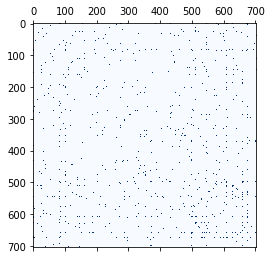

In [5]:
plt.matshow(A.toarray(), cmap="Blues")

In [6]:
characters_id = []
with open("nodes.csv", "r") as fp:
    for line in fp:
        name, name_ID = line.replace("\n", "").split(",")
        characters_id.append(name)

In [7]:
indexes = np.argsort(degrees, axis = 0)
for i in indexes[-1:-4:-1, 0]:
    print(characters_id[i])

Tyrion Lannister
Jaime Lannister
Arya Stark


In [8]:
print(N)
A = clean_network(A)
print(A.shape)

703
(703, 703)


max distance =  4.0
average distance =  2.6952904321325373


Text(0.5, 1.0, 'Number of characters that need n hops to reach another character')

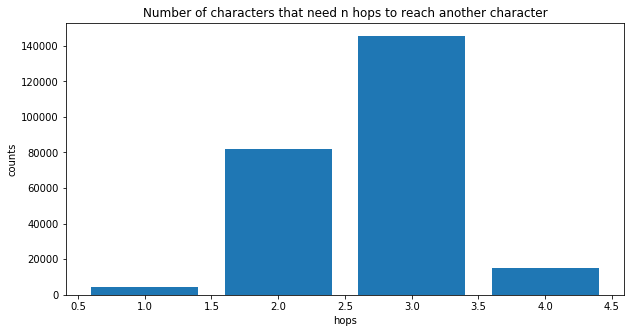

In [9]:
distances, counts = get_distance_distribution(A)
print("max distance = ", distances[-1])
print("average distance = ", np.sum(distances * counts)/np.sum(counts))
plt.figure(figsize=(10, 5))
plt.bar(distances, counts)
plt.xlabel("hops")
plt.ylabel("counts")
plt.title("Number of characters that need n hops to reach another character")

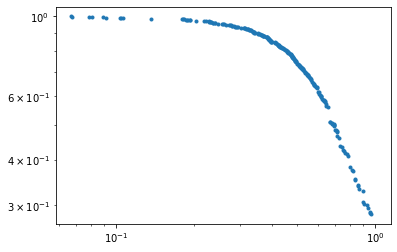

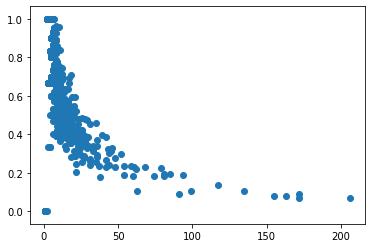

In [19]:
x, y = get_clustering_distribution(A)
plt.loglog(x, ccdf(y), marker=".", linestyle = "None")
plt.figure()
clustering = get_clustering_coefficients(A)
plt.scatter(degrees, clustering)

In [11]:
print(np.sum(x*y))

0.6962753064672782


-0.22841945768210126


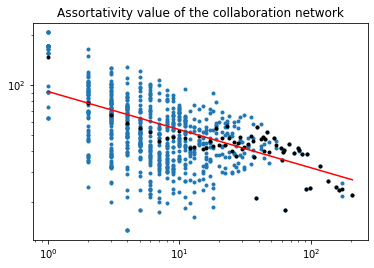

In [12]:
p, unique, knn, temp_knn = get_assortativity_value(A)
degrees = remove_zeros(get_degrees(A))

plt.title("Assortativity value of the collaboration network")
plt.loglog(degrees, temp_knn, marker=".", linestyle='None')
plt.loglog(unique, knn, marker = '.', linestyle='None', c='black')
plt.loglog(unique, np.exp(p[1] + np.log(unique)*p[0]), c = 'r')
print(p[0])
plt.show()

In [13]:
nodes = [[]]
i = 0
with open("connections_for_temp.csv", "r") as fp:
    for line in fp:
        if line == "end\n":
            i += 1
            nodes.append([])
        else:
            nodes[i].append([int(i) for i in line.replace("\n","").split(',')])            

In [26]:
import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)

temporal_A = sp.sparse.csr_matrix((N,N))
temporal_distributions = get_temporal_distribution(temporal_A, nodes)

In [49]:
def parse_distribution(char_dist):
    char_dist_without_duplicates = set(char_dist)
    char_dist_sorted = list(char_dist_without_duplicates)
    char_dist_sorted.sort()
    return np.array(char_dist_sorted)

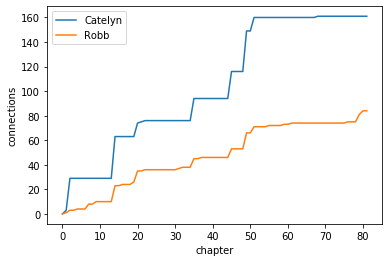

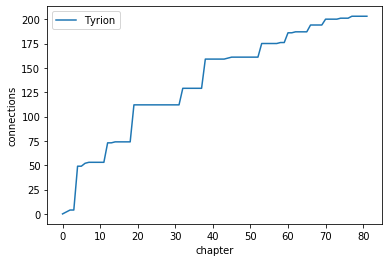

In [44]:
catelyn = temporal_distributions[:, characters_id.index("Catelyn Stark") ,0]
robb = temporal_distributions[:, characters_id.index("Robb Stark") ,0]
plt.plot(catelyn)
plt.plot(robb)
plt.xlabel("chapter")
plt.ylabel("connections")
plt.legend(["Catelyn", "Robb"])
plt.figure()
tyrion = temporal_distributions[:, characters_id.index("Tyrion Lannister") ,0]
plt.plot(tyrion)
plt.xlabel("chapter")
plt.ylabel("connections")
plt.legend(["Tyrion"])

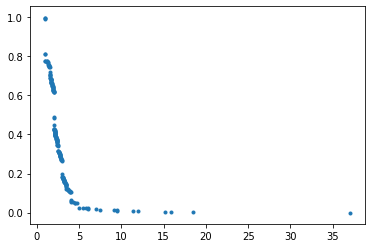

In [61]:
fitnesses = np.zeros(temporal_distributions.shape[1])
for i in range(temporal_distributions.shape[1]):
    y = parse_distribution(temporal_distributions[:, i, 0])
    x = np.arange(len(y))
    if len(y) > 1:
        p = np.polyfit(x, y, 1)
        fitnesses[i] = p[0]
    else:
        fitnesses[i] = y
unique, pdf = get_neighbours_pdf(fitnesses)
plt.scatter(unique, ccdf(pdf), marker='.', linestyle = "None")
    

[1.33230174 4.69765623]


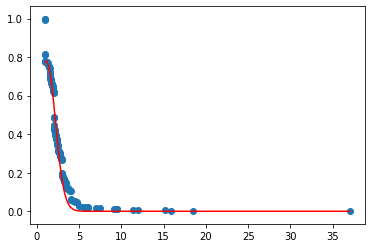

In [88]:
import math
def utility(a, n):
    res = 1
    for i in range(0, n):
        res *= a + i
    return res

def M(a,b,x):
    res = 0
    for i in range(10):
        res += utility(a, i)/utility(b, i)*x**i/math.factorial(i)
    return res

def f(x, alpha, beta):
    return 1/G(alpha)*g(x * beta, alpha)

G = lambda n: np.sqrt(2*np.pi*n)*(n/np.exp(1))**n
g = lambda x, a: (a**-1)*(x**a)*np.exp(-x)*M(1, 1 + a, x)

p = sp.optimize.curve_fit(f, unique, ccdf(pdf))
print(p[0])
plt.scatter(unique, ccdf(pdf))
plt.plot(unique, f(unique, p[0][0], p[0][1]), c = 'r')

0.010504946909398235


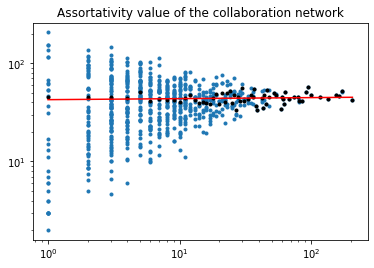

In [16]:
B = random_rewiring(A)
p, unique, knn, temp_knn = get_assortativity_value(B)
degrees = remove_zeros(get_degrees(B))

plt.title("Assortativity value of the collaboration network")
plt.loglog(degrees, temp_knn, marker=".", linestyle='None')
plt.loglog(unique, knn, marker = '.', linestyle='None', c='black')
plt.loglog(unique, np.exp(p[1] + np.log(unique)*p[0]), c = 'r')
print(p[0])
plt.show()

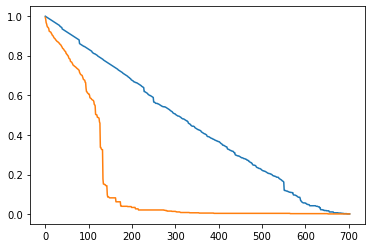

In [17]:
random_removal, attack_removal = check_robustness(A)
plt.plot(np.array(random_removal)/N)
plt.plot(np.array(attack_removal)/N)